# Semana 3 - Desenvolvendo modelos de machine learning para prever churn

Depois de tratar nosso dataset e explorá-lo, criando visualizações para nos auxiliar na formulação de hipóteses sobre a ocorrência de churn, agora o objetivo é criar diferentes modelos de machine learning que serão responsáveis por prever novos casos de churn a partir da nossa base de dados.

## Importando dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(20)

dados = pd.read_csv('./data_churn_rate_processed.csv')
pd.set_option('display.max_columns', 100)

dados

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_mensal,cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque por correio,2.19,65.60,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque por correio,2.00,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.46,73.90,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque por correio,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,Sim,Não,Não,Sim,Não,Não,Anual,Não,Cheque por correio,1.84,55.15,742.90
7263,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,2.84,85.10,1873.70
7264,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque por correio,1.68,50.30,92.75
7265,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,Bienal,Não,Cheque por correio,2.26,67.85,4627.65


## Tratamento final dos dados

Primeiro vamos filtrar nosso dataset com o objetivo de descartar os valores de churn 'Indefinidos', pois para treinar nossos modelos vamos utilizar apenas instâncias devidamente classificadas.

Além disso, duas colunas também serão descartadas, pois são redundantes ("cobranca_mensal" traz a mesma informação que "cobranca_diaria") ou representam identificadores únicos dos clientes ("id_cliente")

In [2]:
dados = dados.loc[dados.churn != 'Indefinido'].reset_index(drop=True)

dados.drop(['id_cliente','cobranca_mensal'], axis=1, inplace=True)

Modelos de machine learning trabalham sempre com valores numéricos, até mesmo no caso de variáveis categóricas. 

Por isso, precisamos adequar nosso dataset a essa relidade, convertendo variáveis categóricas em valores numéricos binários para representar a idade de Sim e Não (0 = não, 1 = sim).

### Transformação de categorico string para binário

In [3]:
# Colunas categóricas de comportamento binário. Vamos converter os Nãos para 0 e os Sims para 1. Além disso, gênero "Feminino" receberá valor 0 e "Masculino" valor 1.round

dados.replace({'Não':0, 'Sim':1, 'Feminino':0,'Masculino':1}, inplace=True)

Outra variável que segue esse padrão é a `multiplas_linhas`. Apesar de ser composta por três valores únicos ('Sim', 'Não' e 'Sem serviço telefônico'), o valor de 'Sem serviço telefônico' não traz nenhuma informação nova ao dataset, pois também significa que o cliente não tem múltiplas linhas telefônicas.

Portanto, podemos também aplicar a lógica binária nesta coluna

In [4]:
# Convertendo valores de 'Sem serviço telefônico' para 'Não'
dados.loc[dados.multiplas_linhas == 'Sem serviço telefônico','multiplas_linhas'] = 'Não'

# Convertendo coluna 'multiplas_linhas' para lógica binária
dados.multiplas_linhas.replace({'Não':0,'Sim':1}, inplace=True)
dados.multiplas_linhas.unique()

array([0, 1])

A mesma coisa acontece nas variáveis de serviços adicionais relacionadas a internet, as quais possuem o valor "Sem serviço de internet"

In [5]:
dados.replace({'Sem serviço de internet':0}, inplace=True)

In [6]:
dados

,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_total
0,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque por correio,2.19,593.30
1,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensal,0,Cheque por correio,2.00,542.40
2,1,1,0,0,0,4,1,0,Fibra ótica,0,0,1,0,0,0,Mensal,1,Cheque eletrônico,2.46,280.85
3,1,1,1,1,0,13,1,0,Fibra ótica,0,1,1,0,1,1,Mensal,1,Cheque eletrônico,3.27,1237.85
4,1,0,1,1,0,3,1,0,Fibra ótica,0,0,0,1,1,0,Mensal,1,Cheque por correio,2.80,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,Anual,0,Cheque por correio,1.84,742.90
7039,1,1,0,1,0,22,1,1,Fibra ótica,0,0,0,0,0,1,Mensal,1,Cheque eletrônico,2.84,1873.70
7040,0,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Mensal,1,Cheque por correio,1.68,92.75
7041,0,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Bienal,0,Cheque por correio,2.26,4627.65


### Encoding

Para finalizar, restaram apenas três colunas categóricas com múltiplas categorias (servico_internet, contrato e forma_pagamento).

Nestes casos, vamos aplicar a técnica de encoding chamada de One-Hot Encoding. 

Nesta técnica **n** novas colunas são criadas no dataset, em que **n** é igual ao número de categorias da coluna sendo convertida. Então, cada uma dessas novas colunas representa a lógica binária de Sim e Não utilizada nas outras colunas do dataset.

In [7]:
colunas_encoding = ['servico_internet','contrato','forma_pagamento']

dados = pd.get_dummies(data=dados, columns=colunas_encoding)

dados

,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,fatura_online,cobranca_diaria,cobranca_total,servico_internet_0,servico_internet_DSL,servico_internet_Fibra ótica,contrato_Anual,contrato_Bienal,contrato_Mensal,forma_pagamento_Cartão de crédito (automático),forma_pagamento_Cheque eletrônico,forma_pagamento_Cheque por correio,forma_pagamento_Transferência bancária (automático)
0,0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,2.19,593.30,0,1,0,1,0,0,0,0,1,0
1,0,1,0,0,0,9,1,1,0,0,0,0,0,1,0,2.00,542.40,0,1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,4,1,0,0,0,1,0,0,0,1,2.46,280.85,0,0,1,0,0,1,0,1,0,0
3,1,1,1,1,0,13,1,0,0,1,1,0,1,1,1,3.27,1237.85,0,0,1,0,0,1,0,1,0,0
4,1,0,1,1,0,3,1,0,0,0,0,1,1,0,1,2.80,267.40,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,1,0,0,1,0,0,0,1.84,742.90,0,1,0,1,0,0,0,0,1,0
7039,1,1,0,1,0,22,1,1,0,0,0,0,0,1,1,2.84,1873.70,0,0,1,0,0,1,0,1,0,0
7040,0,1,0,0,0,2,1,0,0,1,0,0,0,0,1,1.68,92.75,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,67,1,0,1,0,1,1,0,1,0,2.26,4627.65,0,1,0,0,1,0,0,0,1,0


## Balanceamento dos dados

Antes de criar efetivamente nosso modelos, é importante saber se nossa variável target (churn) está balanceada. Uma grande discrepância na distribuição da variável target pode "viciar" nosso modelo de classificação, já que ele não terá uma diversidade de casos para aprender com nossos dados.

In [8]:
dados.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

Há um grande desequilíbrio nos casos da variável target, o que faz sentido já que casos de churn tendem a ser mais incomuns. Para corrigir isso, vamos aplicar a técnica de **oversampling**, utilizando a técnica SMOTE.

In [9]:
# Primeiro vamos separar nosso dataset em X e Y
x = dados.drop(['churn'], axis=1).reset_index(drop=True)
y = dados[['churn']].reset_index(drop=True)

In [10]:
# Oversampling com SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_resampled, y_resampled = sm.fit_resample(x, y)

print(y_resampled.value_counts())

churn
0        5174
1        5174
dtype: int64


# Modelos de Machine Learning

Para qualquer modelo de ML, vamos precisar realizar algumas operações básicas como a separação de datasets de treino e teste ou treino do modelo. 

Com objetivo de facilitar o trabalho, algumas funções serão definidas.

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def executar_classificador(classificador, x_train, x_test, y_train):
    classificador.fit(x_train, y_train.values.ravel())
    y_pred = classificador.predict(x_test)
    return y_pred

def validar_classificador(y_pred, y_test):
    print('Acurácia:', accuracy_score(y_test, y_pred))
    print('Precisão:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, stratify=y_resampled)

## LinearSVC

Acurácia: 0.8511789717819869
Precisão: 0.8492307692307692
Recall: 0.8538283062645011
F1 score: 0.8515233320478209


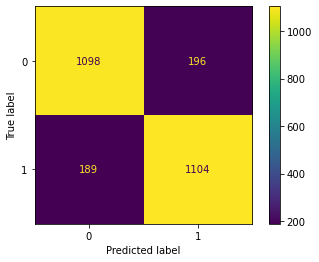

In [16]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(dual=False)

y_pred = executar_classificador(linearSVC, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)